<a href="https://colab.research.google.com/github/artvanila/data_projects/blob/main/MFS_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPSR5 Data Analytics

Tento report se zabývá analýzou dat exportovaných z IFC a RVT modelů projektu SPSR5. Data jsou rozdělena do několika souborů a každý soubor obsahuje více listů, které reprezentují různé skupiny stavebních prvků (viz archiv "Data"). Cílem je zpracovat tyto datové sady pomocí Pythonu a vypočítat několik klíčových metrik, které následně vizualizujeme. Výsledky mají posloužit k lepšímu pochopení a kontrole kvality modelů a podpořit rozhodování v rámci projektového řízení.

Data z IFC modelů byla exportována pomocí Python kódu (viz PDF „Data from IFC“). Data z RVT souborů byla exportována pomocí softwaru Revit.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown
from google.colab import drive

In [34]:
sns.set(style="whitegrid")

In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data ze stavebního modelu.

Vybereme pár skupinů stavebních prvků a provedeme analýzu. Začneme stěnami.

In [36]:
excel_path = '/content/drive/MyDrive/MFS_DA/DATA/ASR.xlsx'
xls = pd.ExcelFile(excel_path)

In [37]:
sheet = 'IfcWall'
df = xls.parse(sheet)


=== Analýza listu: IfcWall ===
→ Stěny
Celkový objem (NetVolume) v m3: 3443.6219905651196
Průměrná výška (Height) v mm: 3180.521206269024


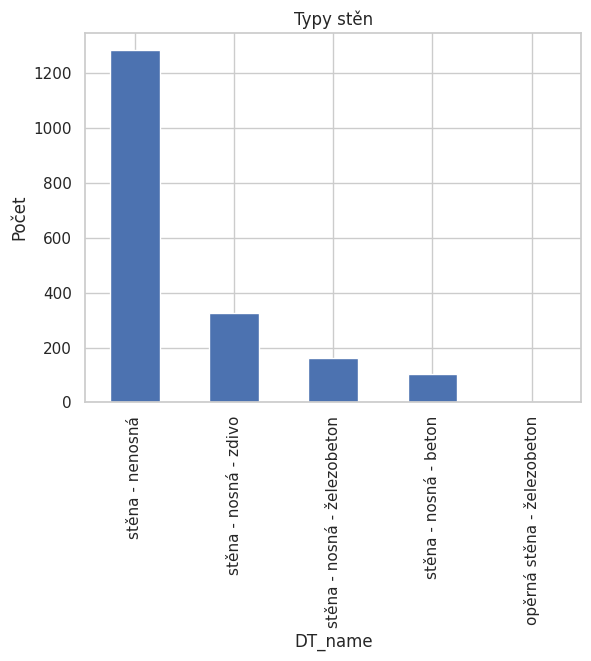

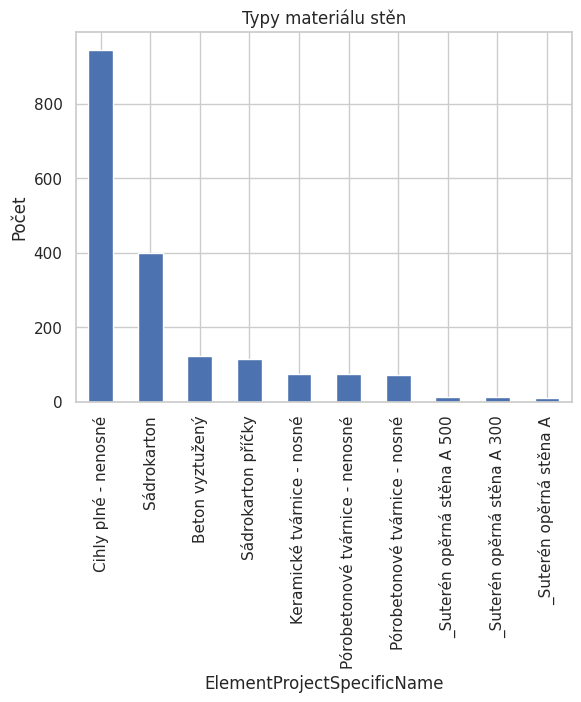

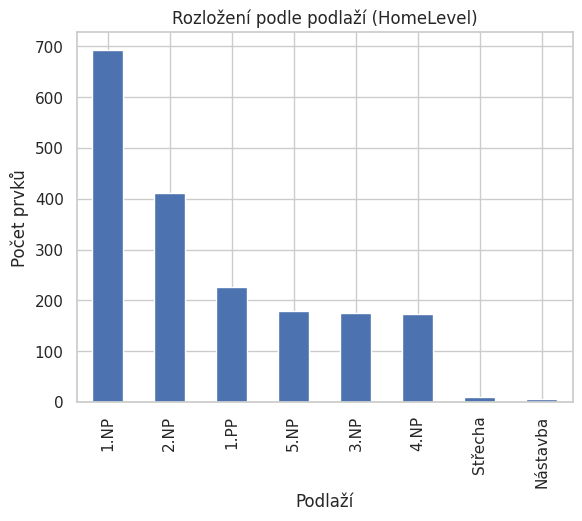

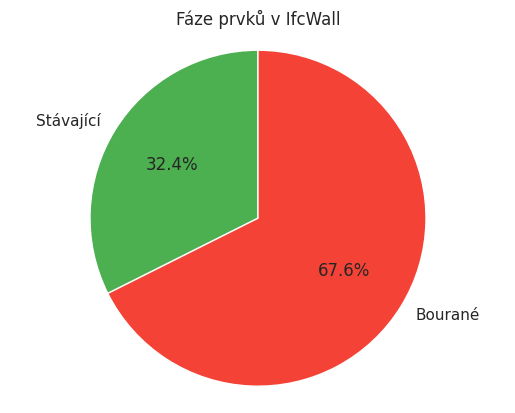

In [38]:
print(f"\n=== Analýza listu: {sheet} ===")
print("→ Stěny")
print("Celkový objem (NetVolume) v m3:", df["NetVolume"].sum())
print("Průměrná výška (Height) v mm:", df["Height"].mean())

# Graf podle typů stěn
fig, ax = plt.subplots()
df["DT_name"].value_counts().head(10).plot(kind="bar", ax=ax, title="Typy stěn")
ax.set_ylabel("Počet")
plt.show()

# Graf podle materiálů
fig, ax = plt.subplots()
df["ElementProjectSpecificName"].value_counts().head(10).plot(kind="bar", ax=ax, title="Typy materiálu stěn")
ax.set_ylabel("Počet")
plt.show()

# Graf rozložení podle podlaží HomeLevel (pokud sloupec existuje)
if "HomeLevel" in df.columns:
    fig, ax = plt.subplots()
    df["HomeLevel"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozložení podle podlaží (HomeLevel)")
    ax.set_ylabel("Počet prvků")
    ax.set_xlabel("Podlaží")
    plt.show()

# Analýza fáze Phase a koláčový graf
if "Phase" in df.columns:
    count_stavajici = df[df["Phase"] == "Stávající"].shape[0]
    count_bourane = df[df["Phase"] == "Bourané"].shape[0]
    total = count_stavajici + count_bourane

    if total > 0:
        ratio_stavajici = count_stavajici / total
        ratio_bourane = count_bourane / total
    else:
        ratio_stavajici = 0
        ratio_bourane = 0

    phase_counts = df["Phase"].value_counts()
    phase_counts = phase_counts.reindex(["Stávající", "Bourané"], fill_value=0)

    fig, ax = plt.subplots()
    ax.pie(
        phase_counts,
        labels=phase_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=["#4CAF50", "#F44336"]
    )
    ax.set_title(f"Fáze prvků v {sheet}")
    ax.axis("equal")
    plt.show()

Z analýzy listu IfcWall vyplývá, že celkový objem stěn činí přibližně 3444 m³ s průměrnou výškou kolem 3180 mm. Nejčastějšími typy stěn jsou nenosné stěny a nosné zdivo, přičemž dominantní materiály jsou cihly plné a sádrokarton. Rozložení stěn je nejvíce koncentrováno v nižších podlažích (1.NP a 2.NP). Z hlediska fáze většina prvků (67,6 %) je určena k demolici, zatímco zbylá část zůstává stávající. Výsledky poskytují důležité informace pro plánování a řízení stavebních prací.

Podíváme se na dveře:

In [39]:
sheet = 'IfcDoor'
df = xls.parse(sheet)


=== Analýza listu: IfcDoor ===
→ Dveře
Průměrná šířka (Width): 983.35
Průměrná výška (Height): 2022.27
Unikátních identifikátorů dveří: 2


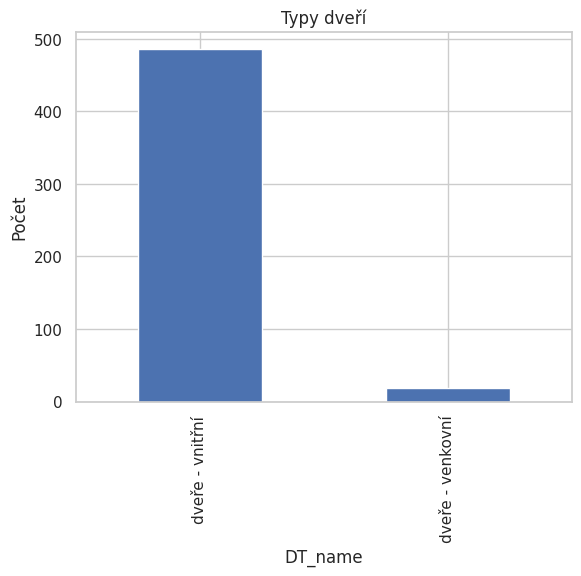

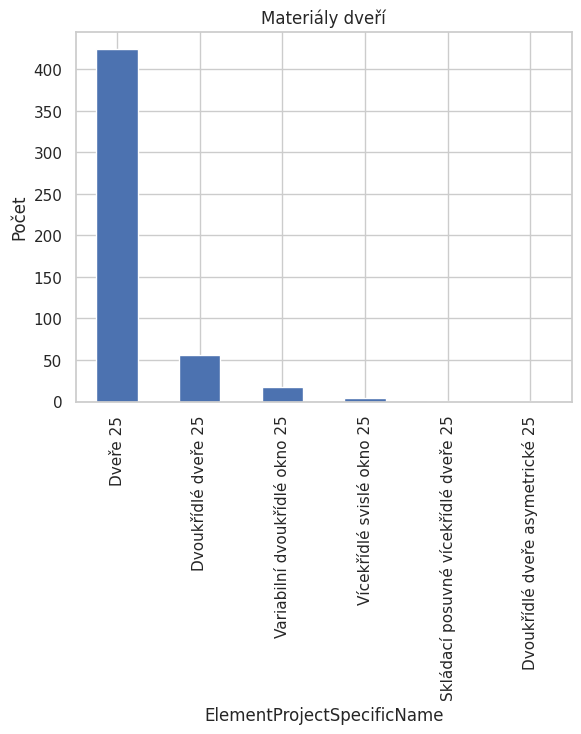

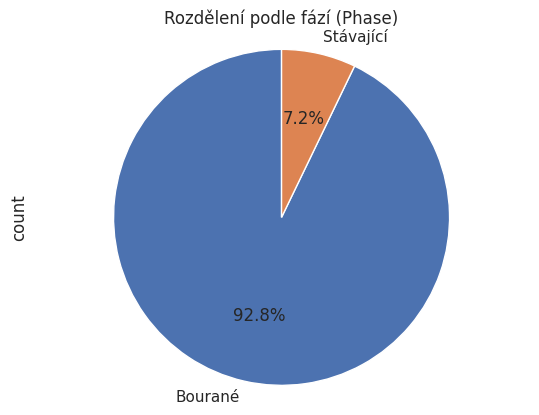

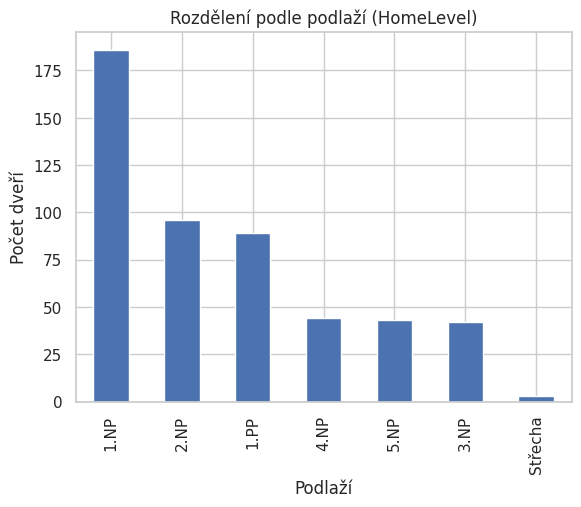

In [40]:
print(f"\n=== Analýza listu: {sheet} ===")
print("→ Dveře")

# Číselné metriky
print(f"Průměrná šířka (Width): {df['Width'].mean():.2f}")
print(f"Průměrná výška (Height): {df['Height'].mean():.2f}")

# Počet unikátních identifikátorů dveří
print(f"Unikátních identifikátorů dveří: {df['ElementProjectSpecificIdentifier'].nunique()}")

# Funkce pro vykreslení sloupcových grafů podle kategorií ve sloupcích
def plot_value_counts(column_name, title, top_n=10):
    if column_name in df.columns:
        counts = df[column_name].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Počet")
        plt.show()

# Kategorie rozdělení
plot_value_counts("DT_name", "Typy dveří")
plot_value_counts("ElementProjectSpecificName", "Materiály dveří")

# Rozdělení podle fází (Phase)
if "Phase" in df.columns:
    phase_counts = df["Phase"].value_counts()
    fig, ax = plt.subplots()
    phase_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=ax)
    ax.set_title("Rozdělení podle fází (Phase)")
    ax.axis("equal")
    plt.show()

# Rozdělení podle podlaží (HomeLevel)
if "HomeLevel" in df.columns:
    fig, ax = plt.subplots()
    df["HomeLevel"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdělení podle podlaží (HomeLevel)")
    ax.set_ylabel("Počet dveří")
    ax.set_xlabel("Podlaží")
    plt.show()

Analýza listu IfcDoor ukazuje, že průměrná šířka dveří je přibližně 983 mm a průměrná výška kolem 2022 mm. Nejčastějším typem jsou vnitřní dveře, následované dveřmi venkovními. Materiálově dominují „Dveře 25“ a „Dvoukřídlé dveře 25“. Většina dveří (92,8 %) je určena k demolici, zatímco jen malá část zůstává stávající. Dveře jsou nejvíce zastoupeny v prvním nadzemním podlaží a v suterénu.

Přiště se podíváme na obkaldové konstrukce.

In [41]:
sheet = 'IfcCovering'
df = xls.parse(sheet)


=== Analýza listu: IfcCovering ===
→ Pokrytí (Covering)
Průměrná šířka (Width): 30.33
Průměrná výška (Height): 2159.03
Průměrná délka (Length): 2716.34
Celková plocha (GrossArea): 20211.06
Celková čistá plocha (NetArea): 18741.58
Celková čistá plocha boční strany (NetSideArea): 20022.88
Unikátních identifikátorů pokrytí: 17


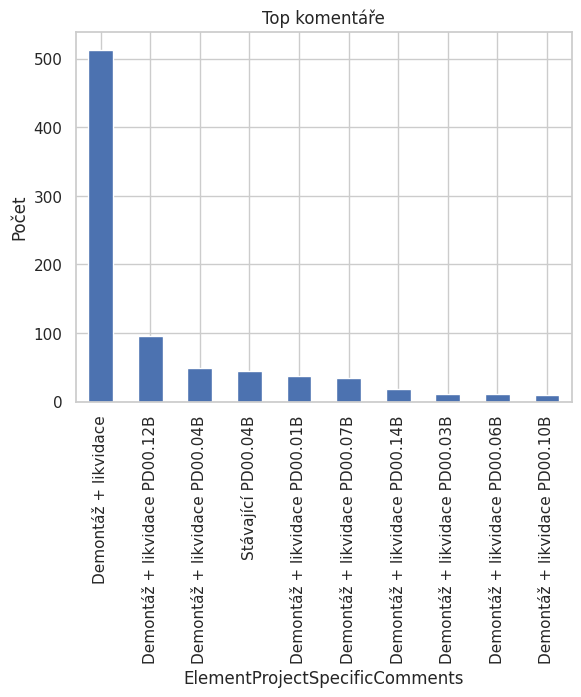

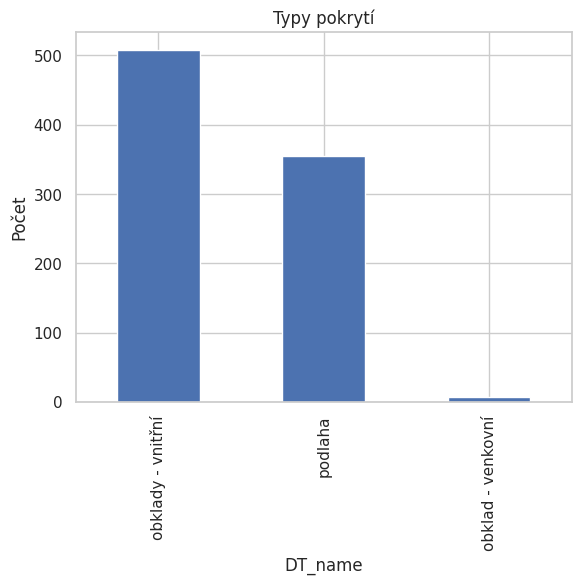

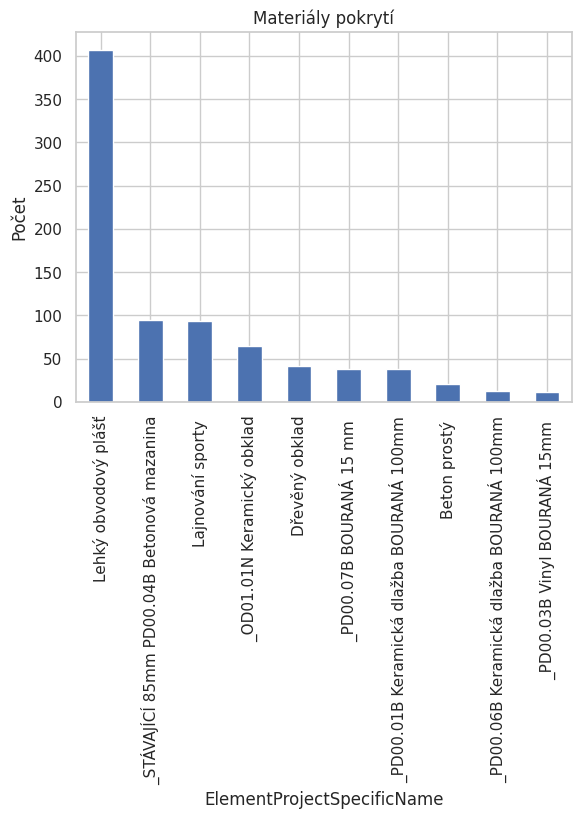

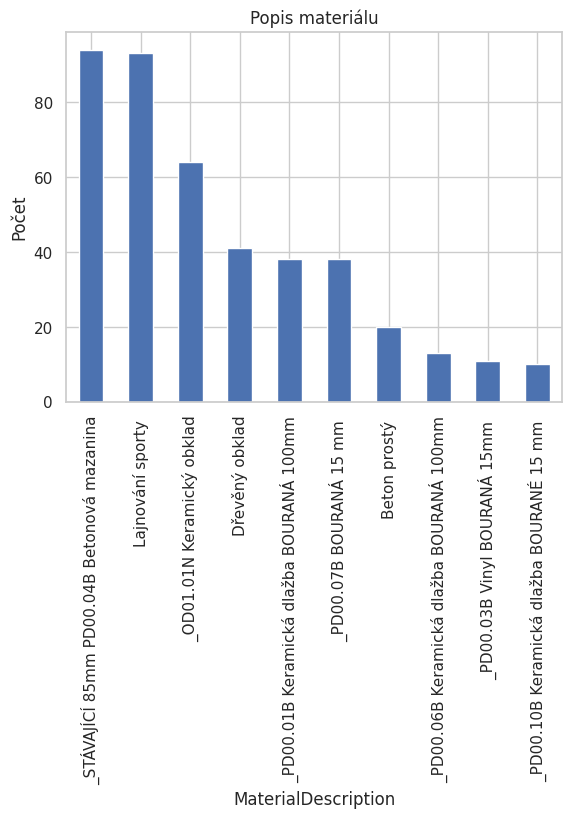

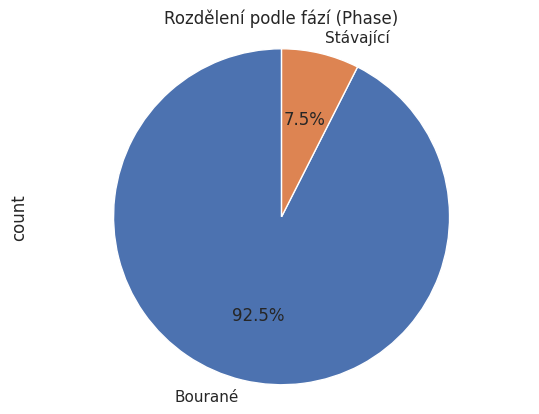

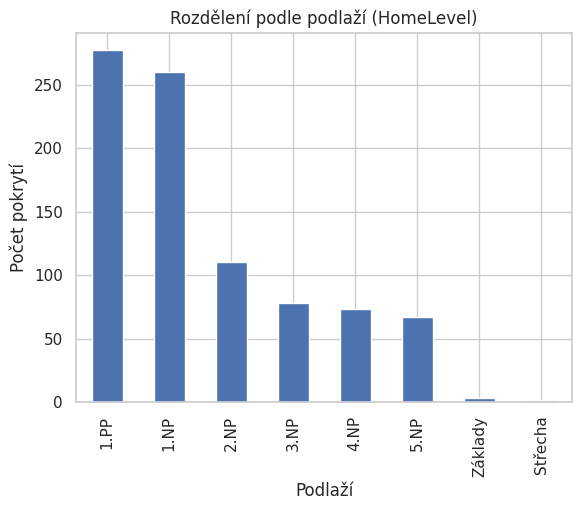

In [42]:
print(f"\n=== Analýza listu: {sheet} ===")
print("→ Pokrytí (Covering)")

# Číselné metriky
print(f"Průměrná šířka (Width): {df['Width'].mean():.2f}")
print(f"Průměrná výška (Height): {df['Height'].mean():.2f}")
print(f"Průměrná délka (Length): {df['Length'].mean():.2f}")

print(f"Celková plocha (GrossArea): {df['GrossArea'].sum():.2f}")
print(f"Celková čistá plocha (NetArea): {df['NetArea'].sum():.2f}")
print(f"Celková čistá plocha boční strany (NetSideArea): {df['NetSideArea'].sum():.2f}")

print(f"Unikátních identifikátorů pokrytí: {df['ElementProjectSpecificIdentifier'].nunique()}")

# Funkce pro tvorbu sloupcových grafů podle kategorií
def plot_value_counts(column_name, title, top_n=10):
    if column_name in df.columns:
        counts = df[column_name].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Počet")
        plt.show()

# Kategorie
plot_value_counts("ElementProjectSpecificComments", "Top komentáře")
plot_value_counts("DT_name", "Typy pokrytí")
plot_value_counts("ElementProjectSpecificName", "Materiály pokrytí")
plot_value_counts("MaterialDescription", "Popis materiálu")

# Rozdělení podle fází
if "Phase" in df.columns:
    phase_counts = df["Phase"].value_counts()
    fig, ax = plt.subplots()
    phase_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=ax)
    ax.set_title("Rozdělení podle fází (Phase)")
    ax.axis("equal")
    plt.show()

# Rozdělení podle podlaží (HomeLevel)
if "HomeLevel" in df.columns:
    fig, ax = plt.subplots()
    df["HomeLevel"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdělení podle podlaží (HomeLevel)")
    ax.set_ylabel("Počet pokrytí")
    ax.set_xlabel("Podlaží")
    plt.show()

Komentáře často obsahují frázi "Demontáž + likvidace", což odpovídá bouraným fázím – data zřejmě reflektují rozsáhlé bourací práce. Výskyt stejných nebo podobných komentářů s mírnými odlišnostmi (např. různé kódy PD00.xx) může znamenat duplicitní nebo částečně redundantní záznamy.Hlavní typy jsou „obklady - vnitřní“ a „podlaha“, což odpovídá očekávanému zastoupení pokrytí v budově.
Materiály jsou rozmanité, ale některé mají podivné nebo nekonzistentní označení (např. názvy s podtržítky a čísly). To může komplikovat automatizovanou analýzu a naznačuje potřebu úpravy nebo standardizace dat. Převaha bouraných prvků (92,5 %) potvrzuje, že data se týkají především demoličních prací. To odpovídá i nejčastějším komentářům. Pro další analýzu je vhodné jasně oddělit stávající a bourané prvky.

Přejdeme na sloupy:

In [43]:
sheet = 'IfcColumn'
df = xls.parse(sheet)


=== Analýza listu: IfcColumn ===
→ Sloupy (IfcColumn)
Průměrná délka (Length): 2855.41
Celkový objem (NetVolume): 330.91
Průměrná šířka průřezu (CrossSectionWidth): 2855.41
Průměrná výška průřezu (CrossSectionHeight): 2855.41
Unikátních identifikátorů sloupů: 2


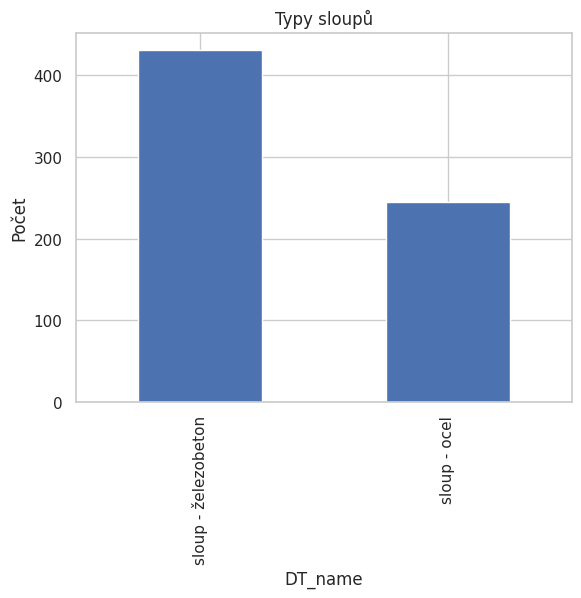

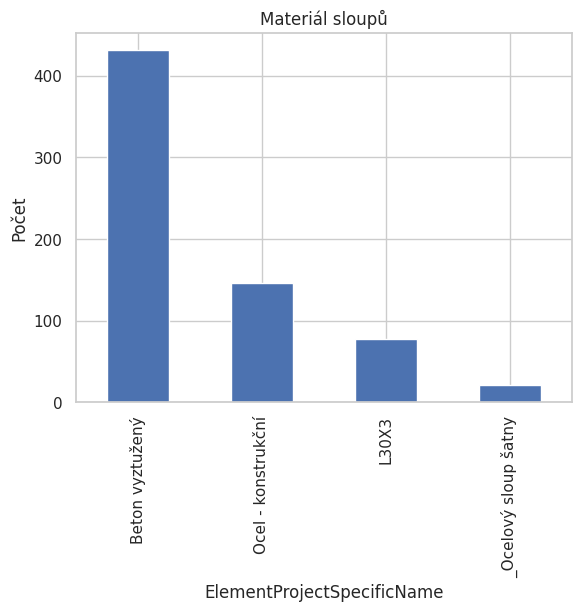

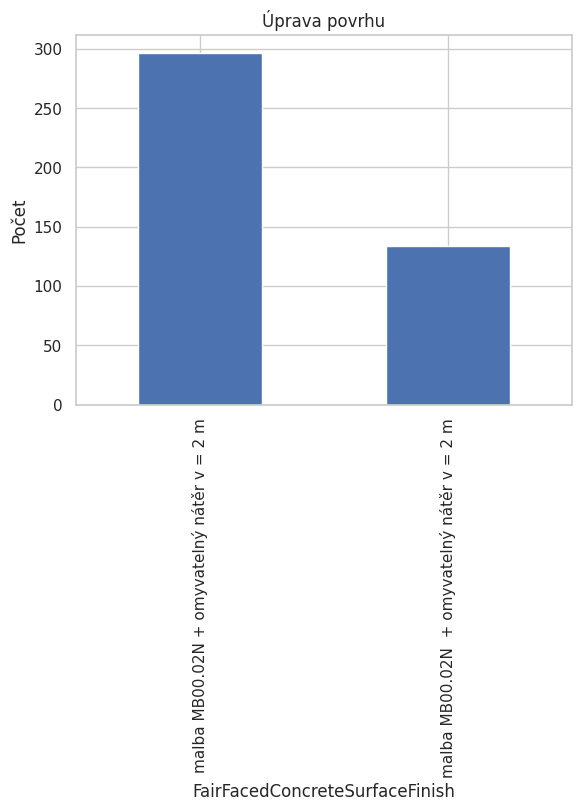

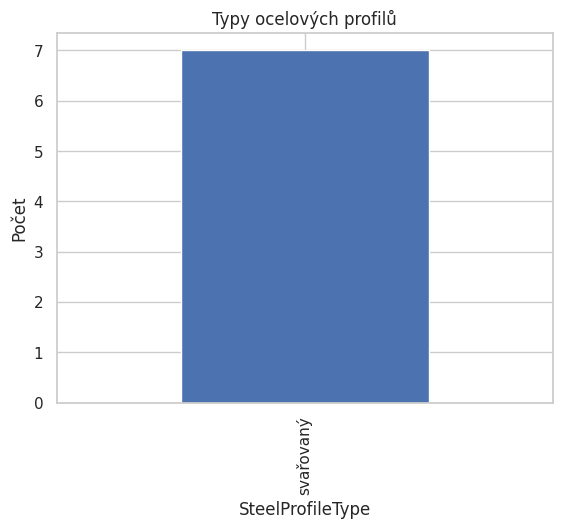

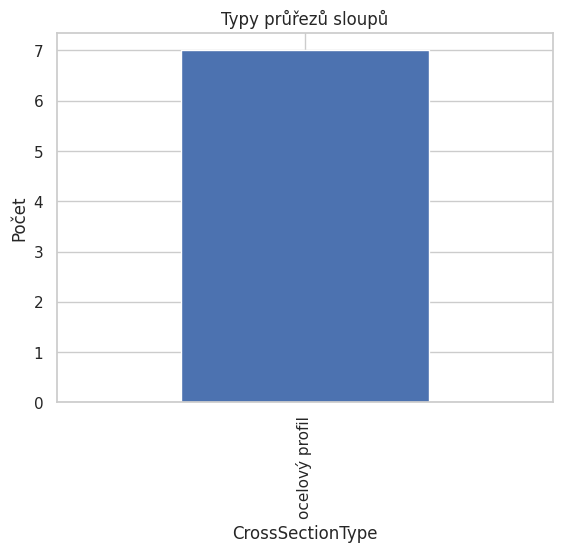

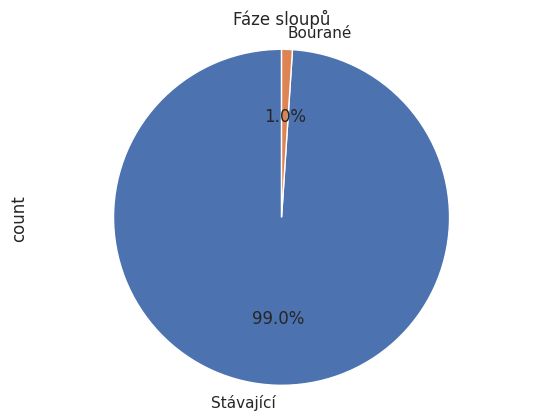

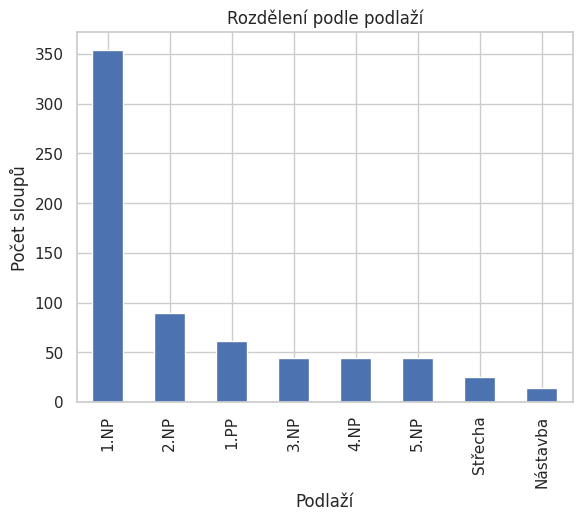

In [44]:
print(f"\n=== Analýza listu: {sheet} ===")
print("→ Sloupy (IfcColumn)")
print(f"Průměrná délka (Length): {df['Length'].mean():.2f}")
print(f"Celkový objem (NetVolume): {df['NetVolume'].sum():.2f}")
print(f"Průměrná šířka průřezu (CrossSectionWidth): {df['CrossSectionWidth'].mean():.2f}")
print(f"Průměrná výška průřezu (CrossSectionHeight): {df['CrossSectionHeight'].mean():.2f}")
print(f"Unikátních identifikátorů sloupů: {df['ElementProjectSpecificIdentifier'].nunique()}")

def plot_value_counts(column_name, title, top_n=10):
    if column_name in df.columns:
        counts = df[column_name].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Počet")
        plt.show()

plot_value_counts("DT_name", "Typy sloupů")
plot_value_counts("ElementProjectSpecificName", "Materiál sloupů")
plot_value_counts("FairFacedConcreteSurfaceFinish", "Úprava povrhu")
plot_value_counts("SteelProfileType", "Typy ocelových profilů")
plot_value_counts("CrossSectionType", "Typy průřezů sloupů")

if "Phase" in df.columns:
    phase_counts = df["Phase"].value_counts()
    fig, ax = plt.subplots()
    phase_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=ax)
    ax.set_title("Fáze sloupů")
    ax.axis("equal")
    plt.show()

if "HomeLevel" in df.columns:
    fig, ax = plt.subplots()
    df["HomeLevel"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdělení podle podlaží")
    ax.set_ylabel("Počet sloupů")
    ax.set_xlabel("Podlaží")
    plt.show()

Analýza dat o sloupech ukazuje, že v datasetu je zaznamenáno 676 sloupů rozdělených převážně do dvou hlavních typů: železobetonových (431 ks) a ocelových (245 ks). Průměrná délka sloupů je kolem 2855 mm. Objem sloupů (celkem cca 331 m³) potvrzuje významnou váhu železobetonových konstrukcí v datovém souboru. V rámci kategorií je vidět mírná nekonzistence v názvech (např. různé způsoby zápisu úpravy viditelného betonu), což může komplikovat filtrování a agregace dat. Rozdělení podle fází jasně ukazuje, že většina sloupů (99 %) je z kategorie „Stávající“, a jen malá část (1 %) je označena jako „Bourané“.

A nakonec zkontrlujeme průvlaky a trámy.

In [45]:
sheet = 'IfcBeam'
df = xls.parse(sheet)


=== Analýza listu: IfcBeam ===
→ Trámy (IfcBeam)
Průměrná délka (Length): 6038.57
Průměrná výška (Height): 124.30
Celkový objem (NetVolume): 616.67
Unikátních trámů (podle Identifier): 3


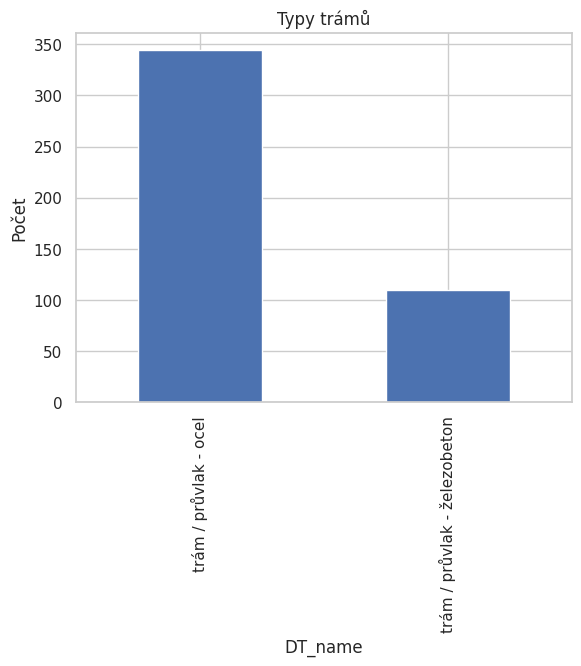

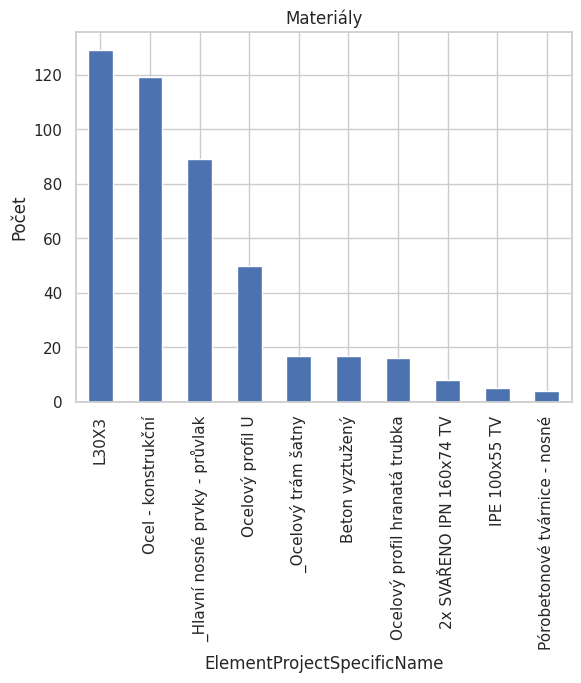

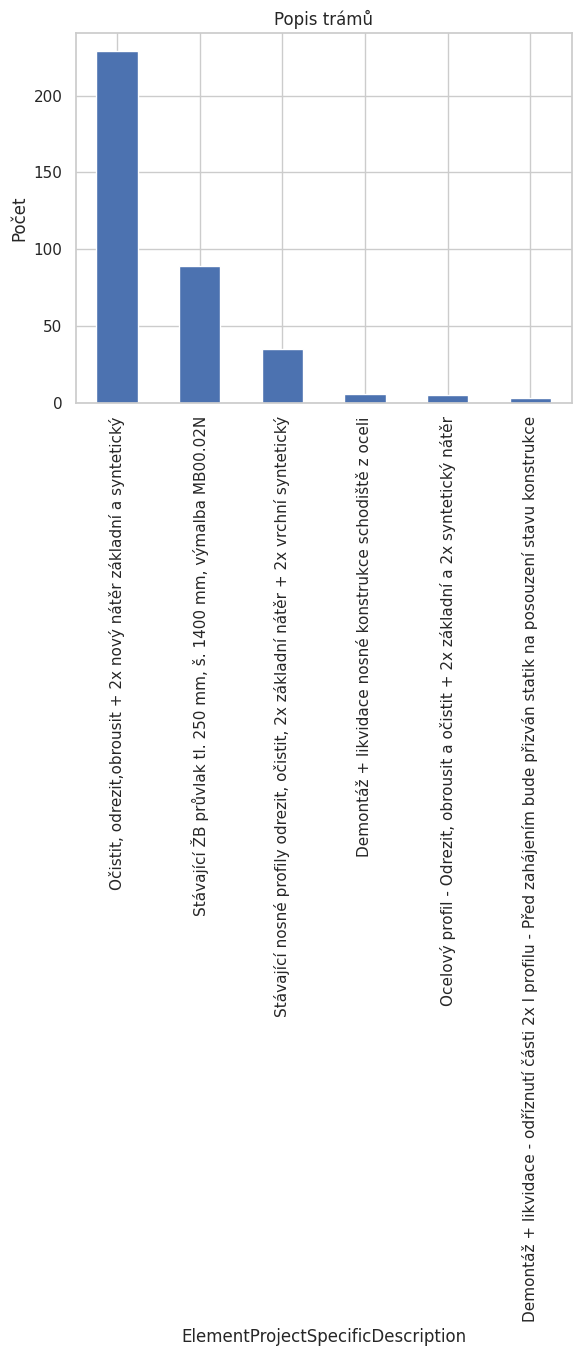

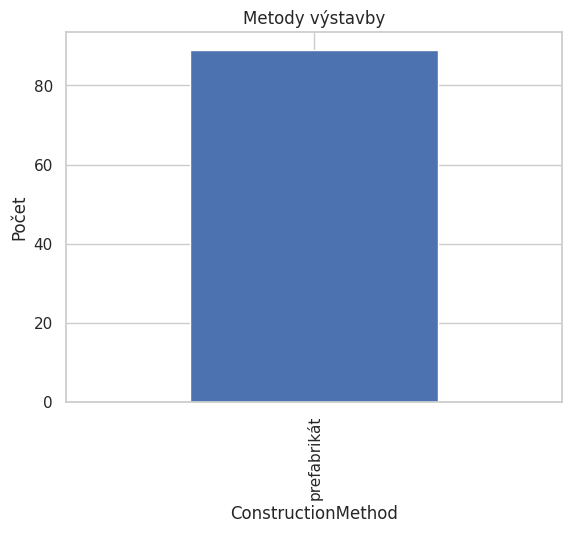

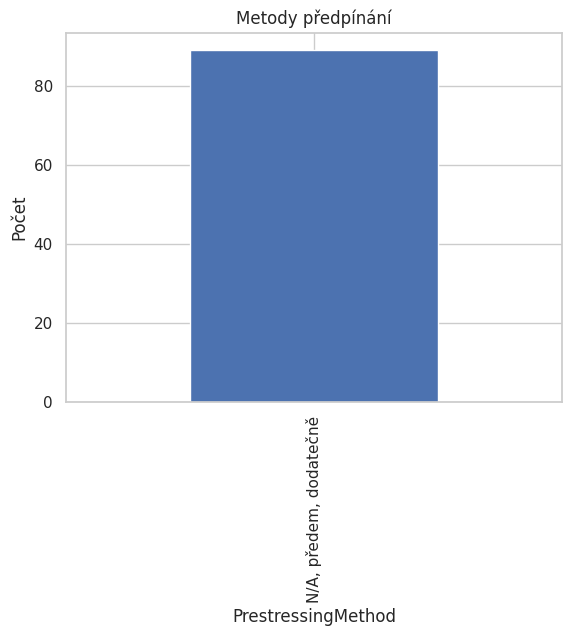

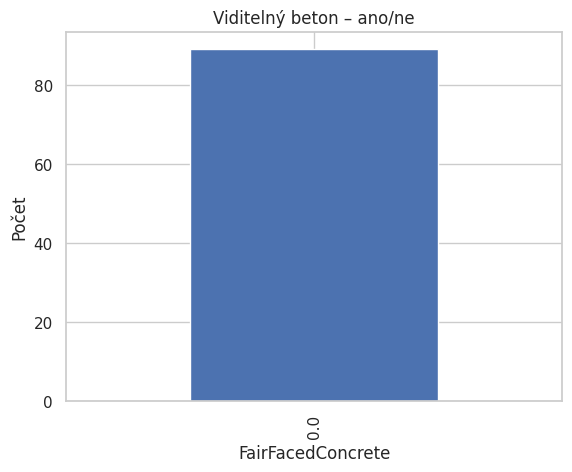

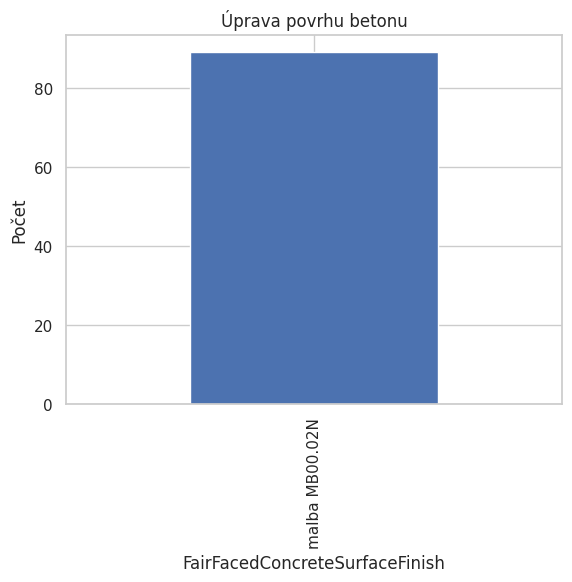

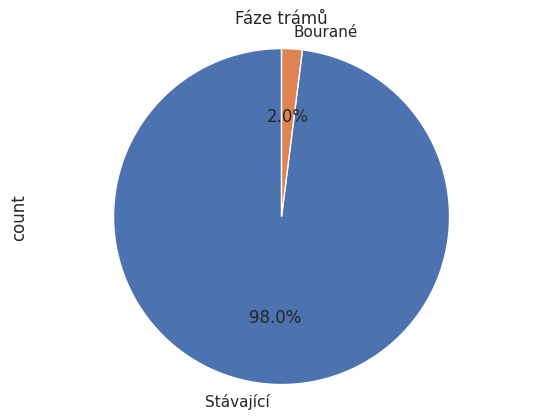

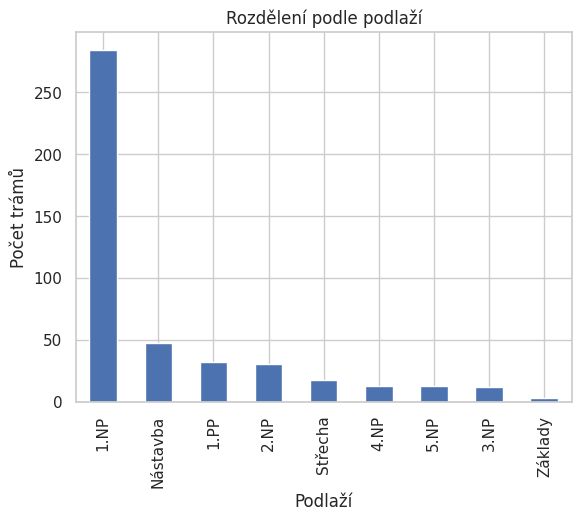

In [46]:
print(f"\n=== Analýza listu: {sheet} ===")
print("→ Trámy (IfcBeam)")
print(f"Průměrná délka (Length): {df['Length'].mean():.2f}")
print(f"Průměrná výška (Height): {df['Height'].mean():.2f}")
print(f"Celkový objem (NetVolume): {df['NetVolume'].sum():.2f}")
print(f"Unikátních trámů (podle Identifier): {df['ElementProjectSpecificIdentifier'].nunique()}")

def plot_value_counts(column_name, title, top_n=10):
    if column_name in df.columns:
        counts = df[column_name].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Počet")
        plt.show()

plot_value_counts("DT_name", "Typy trámů")
plot_value_counts("ElementProjectSpecificName", "Materiály")
plot_value_counts("ElementProjectSpecificDescription", "Popis trámů")
plot_value_counts("ConstructionMethod", "Metody výstavby")
plot_value_counts("PrestressingMethod", "Metody předpínání")
plot_value_counts("FairFacedConcrete", "Viditelný beton – ano/ne")
plot_value_counts("FairFacedConcreteSurfaceFinish", "Úprava povrhu betonu")

if "Phase" in df.columns:
    phase_counts = df["Phase"].value_counts()
    fig, ax = plt.subplots()
    phase_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=ax)
    ax.set_title("Fáze trámů")
    ax.axis("equal")
    plt.show()

if "HomeLevel" in df.columns:
    fig, ax = plt.subplots()
    df["HomeLevel"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdělení podle podlaží")
    ax.set_ylabel("Počet trámů")
    ax.set_xlabel("Podlaží")
    plt.show()

Trámy mají průměrnou délku přes 6 metrů (6038 mm) a průměrnou výšku kolem 124 mm. Celkový objem všech trámů je 616,67 m³.  V datech jsou identifikovány 3 unikátní trámové prvky. Převládají ocelové trámy (344 ks) a železobetonové trámy (110 ks). Mezi materiály jsou hlavně ocelové profily typu L30X3, konstrukční ocel, dále pak beton vyztužený a různé ocelové profily (U, hranaté trubky). Nejčastější je povrchová úprava spočívající v očištění a nátěru (229 ks). Významná část trámů je označena jako stávající se původními nátěry (89 ks). Několik položek se týká demontáže a likvidace stávajících nosných prvků.

Data z vzduchtechniky modelu. Začneme potrubím.

In [47]:
excel_path = '/content/drive/MyDrive/MFS_DA/DATA/VZT.xlsx'
xls = pd.ExcelFile(excel_path)

In [48]:
sheet = 'PotrubÍ'
df = xls.parse(sheet)


=== Analýza listu: PotrubÍ ===
→ Vzduchovody (VZT / potrubí)
Celková délka (Délka): 3169535.00 m
Průměrný ekvivalentní průměr: 498.33 mm
Průměrný průtok (PRŮTOK): 920.25 l/s
Průměrná rychlost (Rychlost): 4.23 m/s
Průměrný dynamický tlak (Dynamický tlak): 11.74 Pa
Celkové tlakové ztráty (Tlaková ztráta2): 4319.00 Pa
Průměrná výška (Výška): 405.14 mm
Průměrná šířka (Šířka): 616.10 mm
Průměrná tloušťka izolace (Tloušťka izolace): 5.44 mm


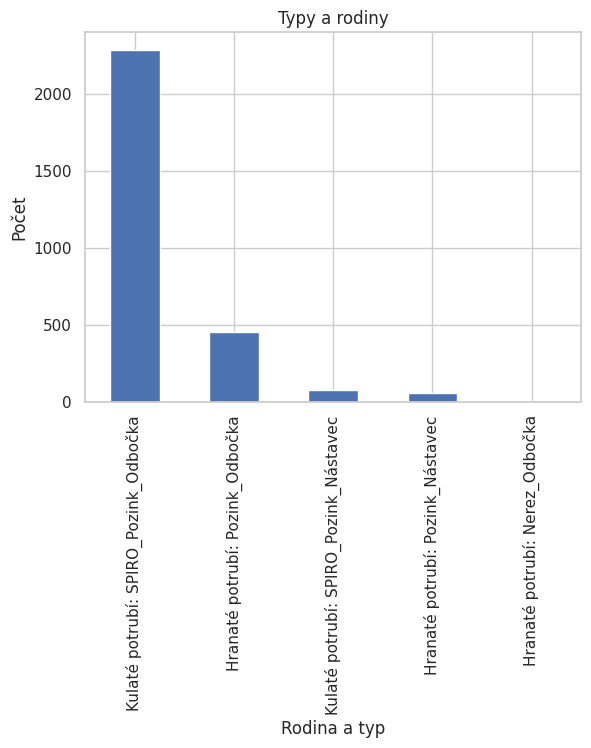

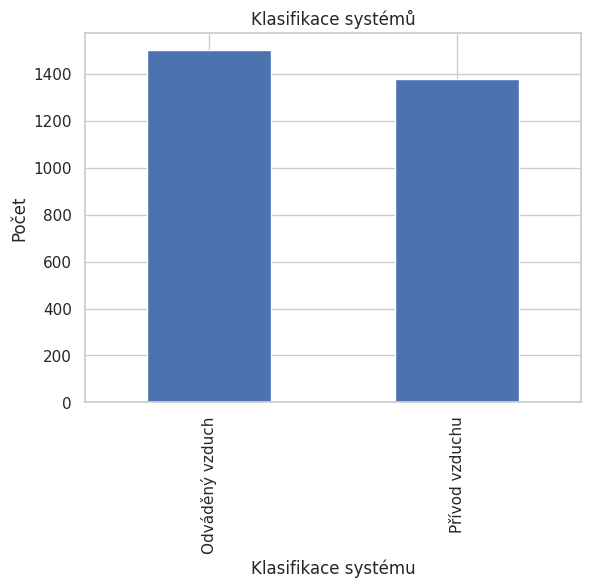

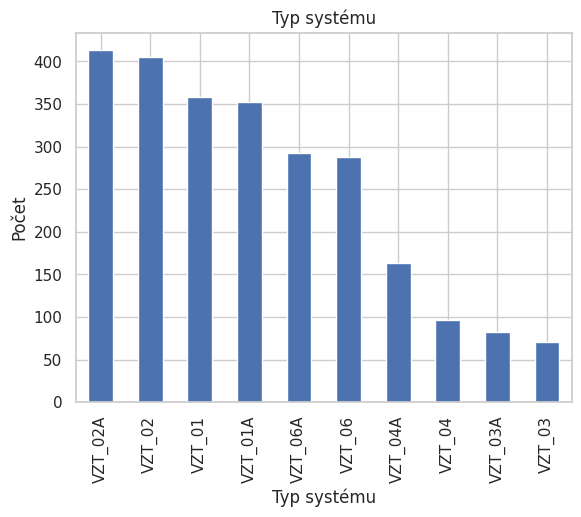

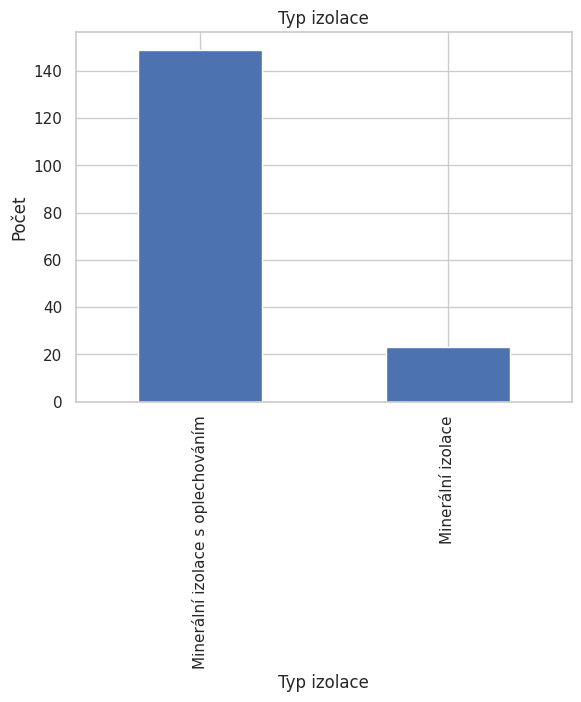

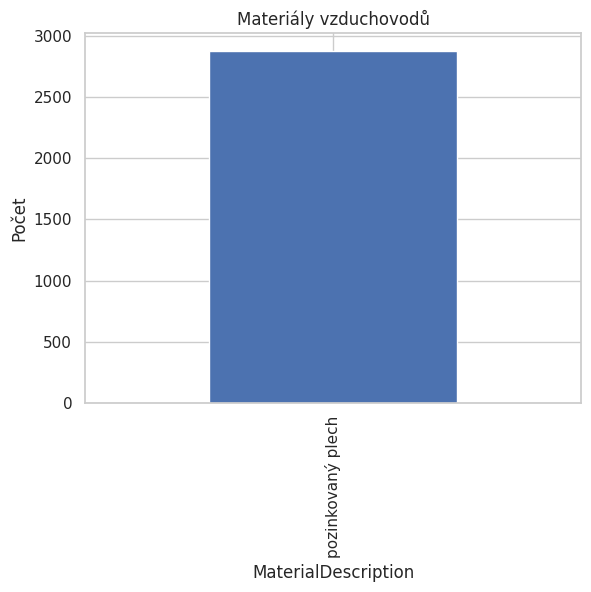

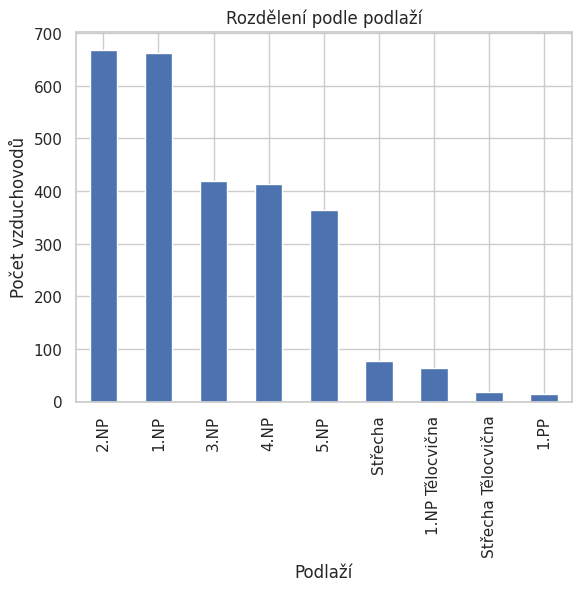

In [49]:
print(f"\n=== Analýza listu: {sheet} ===")
print("→ Vzduchovody (VZT / potrubí)")

print(f"Celková délka (Délka): {df['Délka'].sum():.2f} m")
print(f"Průměrný ekvivalentní průměr: {df['Ekvivaletní průměr'].mean():.2f} mm")
print(f"Průměrný průtok (PRŮTOK): {df['PRŮTOK'].mean():.2f} l/s")
print(f"Průměrná rychlost (Rychlost): {df['Rychlost'].mean():.2f} m/s")
print(f"Průměrný dynamický tlak (Dynamický tlak): {df['Dynamický tlak'].mean():.2f} Pa")
print(f"Celkové tlakové ztráty (Tlaková ztráta2): {df['Tlaková ztráta2'].sum():.2f} Pa")

def plot_value_counts(column_name, title, top_n=10):
    if column_name in df.columns:
        counts = df[column_name].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Počet")
        plt.show()

print(f"Průměrná výška (Výška): {df['Výška'].mean():.2f} mm")
print(f"Průměrná šířka (Šířka): {df['Šířka'].mean():.2f} mm")
print(f"Průměrná tloušťka izolace (Tloušťka izolace): {df['Tloušťka izolace'].mean():.2f} mm")

plot_value_counts("Rodina a typ", "Typy a rodiny")
plot_value_counts("Klasifikace systému", "Klasifikace systémů")
plot_value_counts("Typ systému", "Typ systému")
plot_value_counts("Typ izolace", "Typ izolace")
plot_value_counts("MaterialDescription", "Materiály vzduchovodů")

if "PODLAŽÍ" in df.columns:
    fig, ax = plt.subplots()
    df["PODLAŽÍ"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdělení podle podlaží")
    ax.set_ylabel("Počet vzduchovodů")
    ax.set_xlabel("Podlaží")
    plt.show()

Celková délka vzduchovodů dosahuje více než 3 169 km, což ukazuje na rozsáhlý a komplexní systém vzduchotechniky. Průměrný ekvivalentní průměr potrubí je téměř 500 mm. Průměrný průtok vzduchu je vysoký (920 l/s), což odpovídá významné kapacitě vzduchotechniky. Průměrná rychlost proudění 4,23 m/s je v rámci běžných hodnot pro vzduchovody. Průměrná hodnota dynamického tlaku 11,74 Pa odpovídá běžným provozním parametrům. Nejvíce je zastoupeno kulaté pozinkované potrubí SPIRO s odbočkami. Hranaté pozinkované potrubí je také významně využíváno, ale méně. Klasifikace systémů ukazuje přibližně vyrovnaný poměr mezi přívodem a odvodem vzduchu, což je důležité pro vyváženost vzduchotechniky a správnou funkci systému. Materiálově dominuje pozinkovaný plech, který je tradiční a ekonomicky výhodnou volbou pro vzduchovody.Rozdělení potrubí podle podlaží je poměrně rovnoměrné, s nejvyšším počtem vzduchovodů v 1. a 2. nadzemním podlaží.

Přejdeme na tvarovky.

In [50]:
sheet = 'Tvarovky'
df = xls.parse(sheet)


=== Analýza listu: Tvarovky ===
→ Vzduchotechnická armatura (Tvarovky VZT)
Celková délka: 694873.00 mm
Celková hmotnost: 4726.15 kg
MAXIMÁLNÍ OBVOD: průměr = 807.83, max = 5700.00
MAXIMÁLNÍ ROZMĚR: průměr = 271.45, max = 1600.00
POLOMĚR ZAOBLENÍ: průměr = 170.29, max = 710.00
TLAKOVÁ ZTRÁTA: průměr = nan, max = nan
TLOUŠŤKA IZOLACE: průměr = 0.00, max = 0.00
TLOUŠŤKA STĚNY: průměr = 1.00, max = 1.00
Průměrný průtok vzduchu (PRŮTOK): 525.22


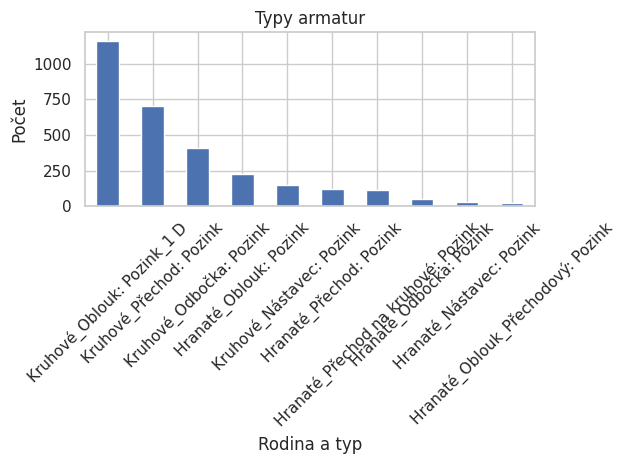

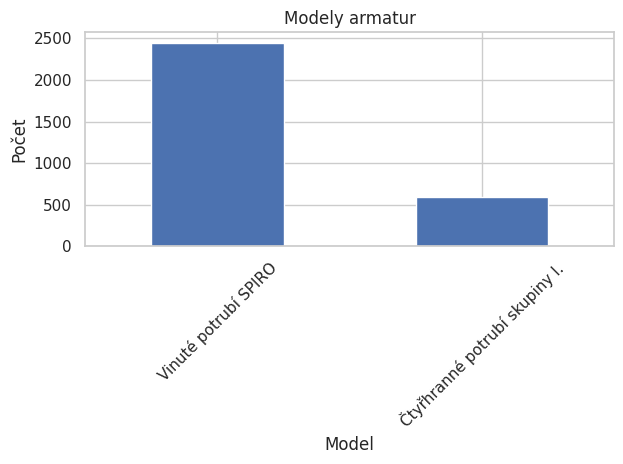

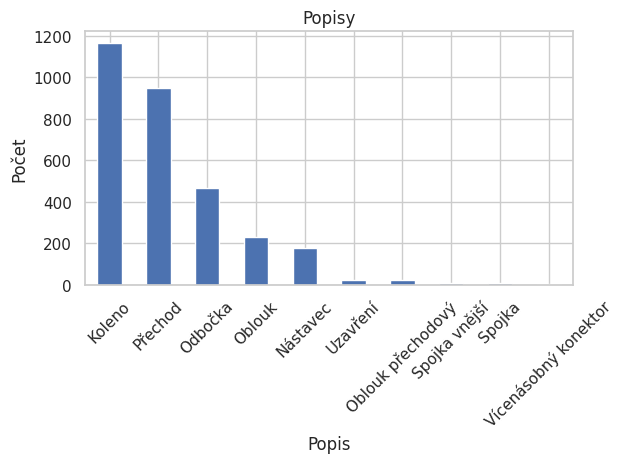

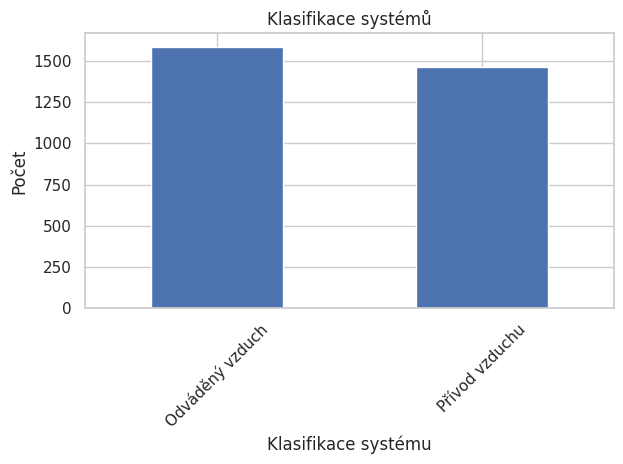

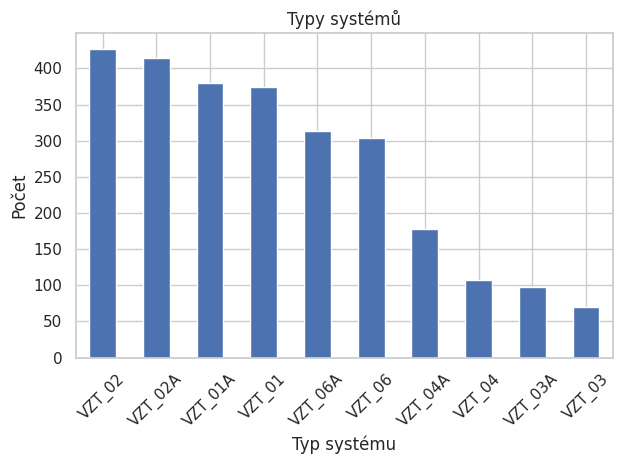

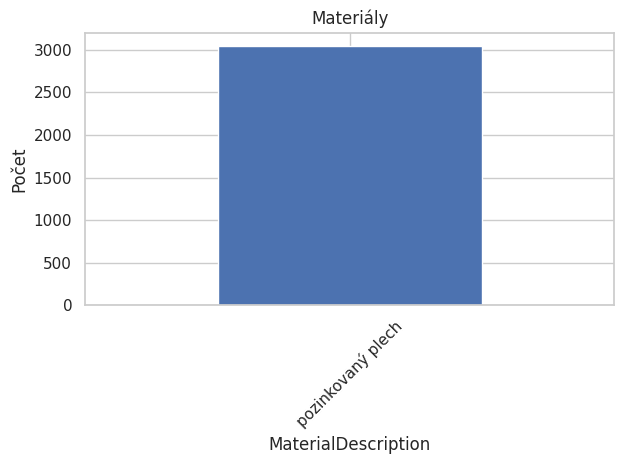

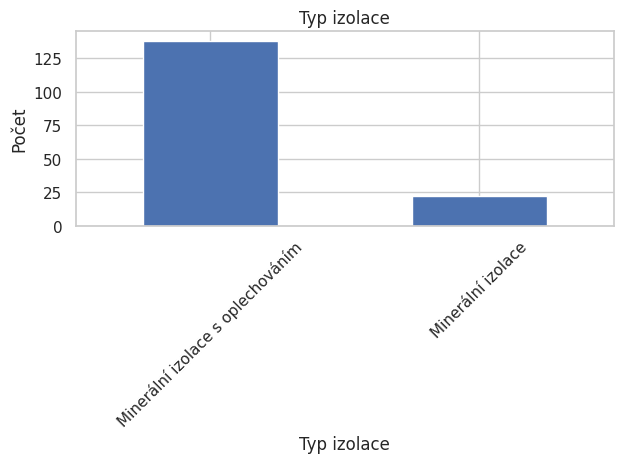

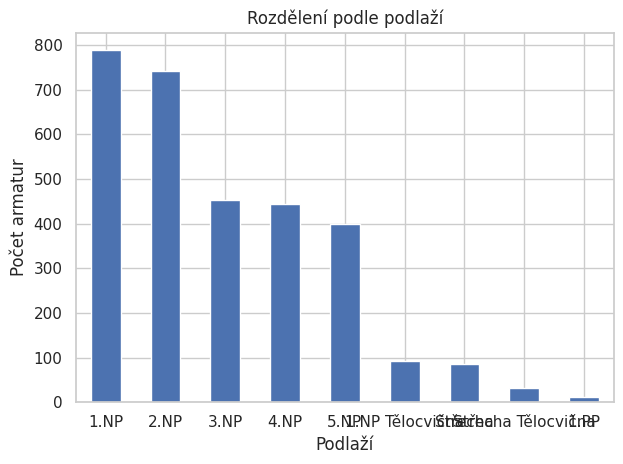

POTRUBÍ_PRŮMĚR: průměr = 182.26
POTRUBÍ_PRŮMĚR 2: průměr = 141.09
POTRUBÍ_VÝŠKA: průměr = 397.22
POTRUBÍ_VÝŠKA 2: průměr = 460.87
POTRUBÍ_ŠÍŘKA: průměr = 528.18
POTRUBÍ_ŠÍŘKA 2: průměr = 711.83
Průměrný úhel natočení: 70.88°


In [51]:
print(f"\n=== Analýza listu: {sheet} ===")
print("→ Vzduchotechnická armatura (Tvarovky VZT)")

if "DÉLKA" in df.columns:
    print(f"Celková délka: {df['DÉLKA'].sum():.2f} mm")
if "HMOTNOST" in df.columns:
    df["HMOTNOST_clean"] = df["HMOTNOST"].str.replace("kg", "").str.replace(",", ".").astype(float)
    print(f"Celková hmotnost: {df['HMOTNOST_clean'].sum():.2f} kg")

for col in ["MAXIMÁLNÍ OBVOD", "MAXIMÁLNÍ ROZMĚR", "POLOMĚR ZAOBLENÍ", "TLAKOVÁ ZTRÁTA", "TLOUŠŤKA IZOLACE", "TLOUŠŤKA STĚNY"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        print(f"{col}: průměr = {df[col].mean():.2f}, max = {df[col].max():.2f}")

if "PRŮTOK" in df.columns:
    df["PRŮTOK"] = pd.to_numeric(df["PRŮTOK"], errors="coerce")
    print(f"Průměrný průtok vzduchu (PRŮTOK): {df['PRŮTOK'].mean():.2f}")

def plot_bar(col, title, top_n=10):
    if col in df.columns:
        counts = df[col].value_counts().head(top_n)
        fig, ax = plt.subplots()
        counts.plot(kind="bar", ax=ax, title=title)
        ax.set_ylabel("Počet")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_bar("Rodina a typ", "Typy armatur")
plot_bar("Model", "Modely armatur")
plot_bar("Popis", "Popisy")
plot_bar("Klasifikace systému", "Klasifikace systémů")
plot_bar("Typ systému", "Typy systémů")
plot_bar("MaterialDescription", "Materiály")
plot_bar("Typ izolace", "Typ izolace")

if "Podlaží" in df.columns:
    fig, ax = plt.subplots()
    df["Podlaží"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax, title="Rozdělení podle podlaží")
    ax.set_ylabel("Počet armatur")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

for dim_col in ["POTRUBÍ_PRŮMĚR", "POTRUBÍ_PRŮMĚR 2", "POTRUBÍ_VÝŠKA", "POTRUBÍ_VÝŠKA 2", "POTRUBÍ_ŠÍŘKA", "POTRUBÍ_ŠÍŘKA 2"]:
    if dim_col in df.columns:
        df[dim_col] = pd.to_numeric(df[dim_col], errors="coerce")
        print(f"{dim_col}: průměr = {df[dim_col].mean():.2f}")

if "ÚHEL" in df.columns:
    df["ÚHEL_clean"] = df["ÚHEL"].str.replace("°", "").str.replace(",", ".").astype(float)
    print(f"Průměrný úhel natočení: {df['ÚHEL_clean'].mean():.2f}°")


Celková délka vzduchotechnických tvarovek je 694 873 mm (téměř 695 metrů).Celková hmotnost dosahuje 4726,15 kg. Nejčastější jsou kruhové oblouky (Pozink) a přechody kruhových průměrů. Dominují armatury z pozinkovaného plechu (3048 kusů), což je standardní materiál pro vzduchotechniku díky své odolnosti. Popisy jako „Koleno“, „Přechod“ a „Odbočka“ tvoří většinu komponent, což je v souladu s typickou strukturou vzduchotechnických systémů. Armatury jsou poměrně rovnoměrně rozděleny mezi několik hlavních systémů VZT, s největšími počty u typů VZT_02 a VZT_02A. Podlažně jsou nejvíce komponenty instalovány v přízemí (1.NP) a druhém patře (2.NP). Významná část armatur je i ve vyšších patrech a na střeše, což naznačuje komplexní vzduchotechnický systém v celé budově včetně střešních jednotek.

Podíváme se na modely topení a chlazení.

In [52]:
excel_path = '/content/drive/MyDrive/MFS_DA/DATA/RTCH.xlsx'
xls = pd.ExcelFile(excel_path)

In [53]:
sheet = 'Trubky'
df = xls.parse(sheet)

Délka: průměr = 1349.09, max = 17002.00
Vnitřní průměr: průměr = 18.45, max = 150.00
Vnější průměr: průměr = 21.20, max = 153.00
Průtok: průměr = 0.4403, max = 12.0000
Rychlost: průměr = 0.1804, max = 0.9000
Tlaková ztráta: průměr = 0.1348, max = 3.3000
Součinitel tření: průměr = 0.0000, max = 0.0000


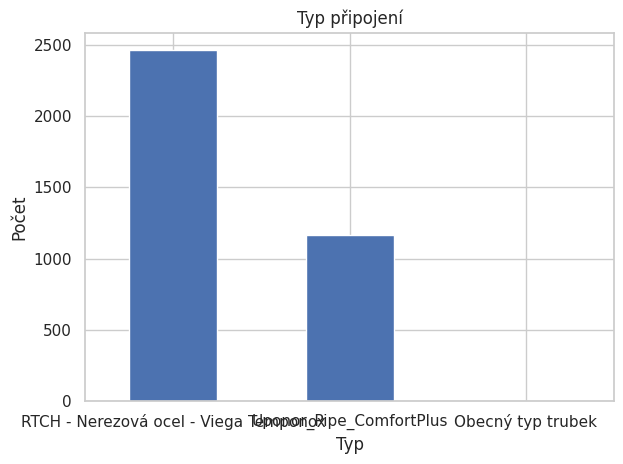

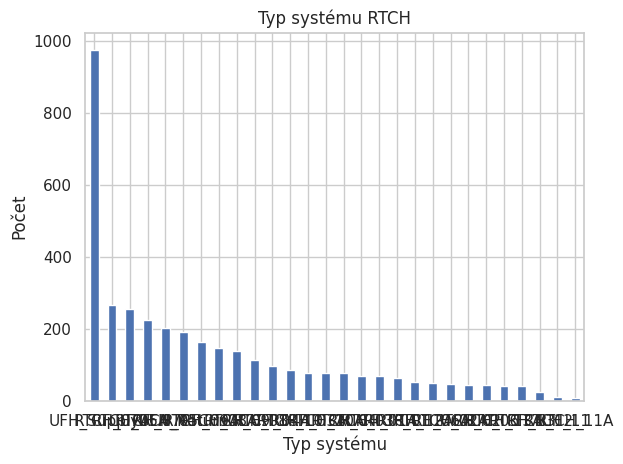

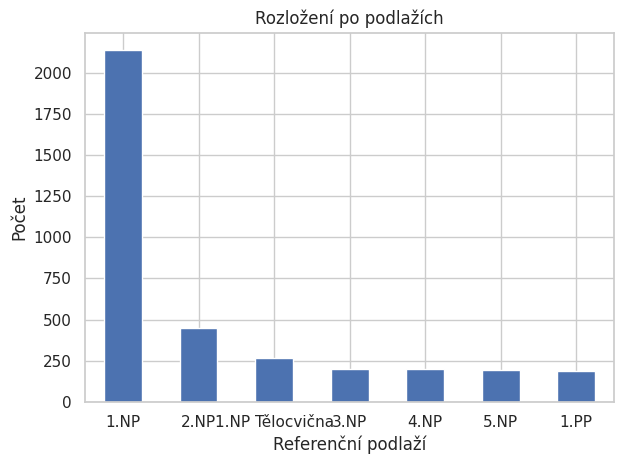

In [54]:
for col in ["Délka", "Vnitřní průměr", "Vnější průměr"]:
    print(f"{col}: průměr = {df[col].mean():.2f}, max = {df[col].max():.2f}")

df.columns = df.columns.str.strip()

sloupce_k_prevodu = ["Průtok", "Rychlost", "Tlaková ztráta", "Součinitel tření"]
for col in sloupce_k_prevodu:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in sloupce_k_prevodu:
    prumer = df[col].mean()
    maximum = df[col].max()
    print(f"{col}: průměr = {prumer:.4f}, max = {maximum:.4f}")

def vykresli_pocet(column, title):
    df[column].value_counts().plot(kind="bar", title=title)
    plt.ylabel("Počet")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

vykresli_pocet("Typ", "Typ připojení")
vykresli_pocet("Typ systému", "Typ systému RTCH")
vykresli_pocet("Referenční podlaží", "Rozložení po podlažích")

 RTCH obsahuje celkovou délku trubek přibližně 17 km, přičemž průměrná délka jednotlivých trubek je kolem 1,35 metru. Rozměry potrubí se pohybují v rozmezí průměrů od 18,45 mm (vnitřní) do 21,2 mm (vnější) v průměru, s maximálními hodnotami až do 150–153 mm. Průměrný průtok v potrubí je 0,44 m³/s, s maximem až 12 m³/s. Průměrná rychlost proudění vzduchu je relativně nízká, 0,18 m/s, s maximem 0,9 m/s, což naznačuje rovnoměrný a nenáročný průtok v potrubí bez vysokých rychlostních špiček. Dominantní typ připojení tvoří nerezové potrubí „RTCH - Nerezová ocel - Viega Temponox“ s 2463 kusy, dále „Uponor_Pipe_ComfortPlus“ s 1164 kusy. Nejvíce trubek se nachází v 1. nadzemním podlaží (2137 ks), dále v 2. NP (447 ks) a v prostorách tělocvičny (268 ks).

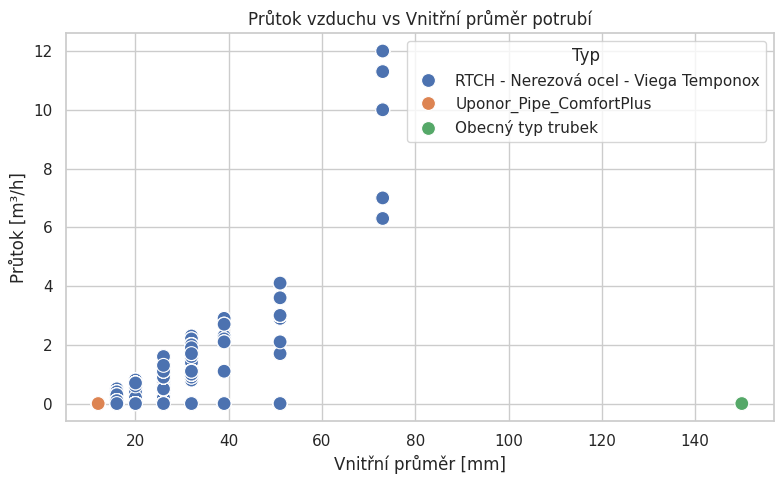

In [55]:
# Průtok vs Vnitřní průměr
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Vnitřní průměr", y="Průtok", hue="Typ", s=100)
plt.title("Průtok vzduchu vs Vnitřní průměr potrubí")
plt.xlabel("Vnitřní průměr [mm]")
plt.ylabel("Průtok [m³/h]")
plt.grid(True)
plt.tight_layout()
plt.show()

Průtok vzduchu roste s rostoucím vnitřním průměrem potrubí. To je očekávané, protože větší průměr umožňuje průchod většího množství vzduchu. Většina měřených hodnot (modré body) patří typu "RTCH - Nerezová ocel - Viega Temponox". U tohoto typu se průtoky pohybují od velmi nízkých hodnot až po zhruba 12 m³/h při vnitřním průměru kolem 80 mm. Většina potrubí se soustředí do průměrů do cca 80 mm, kde je i rozptyl průtoků poměrně široký.

Podíváme se na typy mechanických zařízení.

In [56]:
sheet = 'Mechanické zařízení'
df = xls.parse(sheet)

/tmp/ipython-input-57-180988579.py:9: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


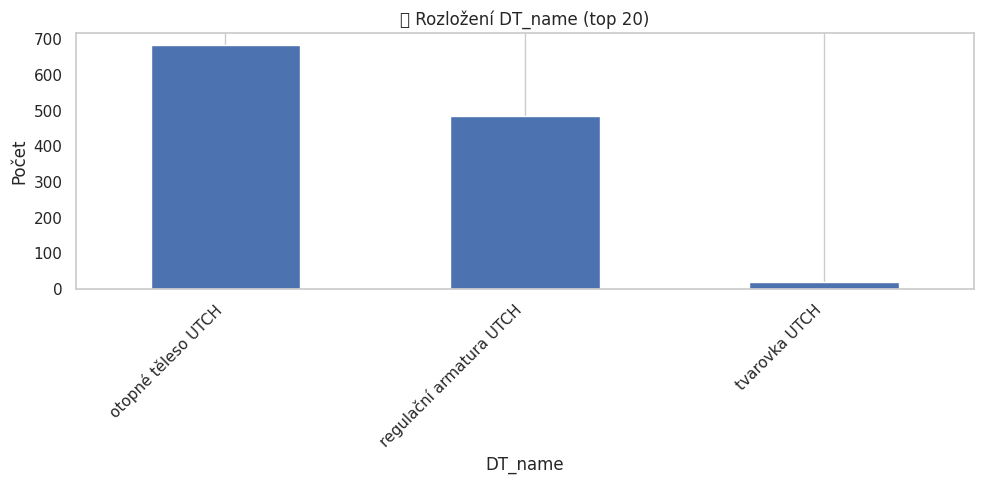

/tmp/ipython-input-57-180988579.py:21: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


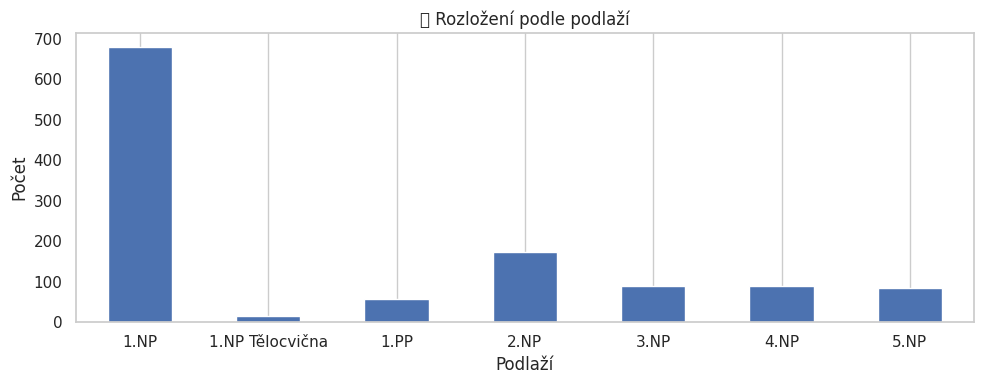

In [57]:
# Rozložení DT_name (top 20)
dt_counts = df["DT_name"].value_counts().head(20)
plt.figure(figsize=(10, 5))
dt_counts.plot(kind="bar")
plt.title("🔧 Rozložení DT_name (top 20)")
plt.ylabel("Počet")
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Rozložení podle podlaží
floor_counts = df["Podlaží"].value_counts().sort_index()
plt.figure(figsize=(10, 4))
floor_counts.plot(kind="bar")
plt.title("🏢 Rozložení podle podlaží")
plt.ylabel("Počet")
plt.xlabel("Podlaží")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Nejčastějším typem prvku v datech je otopné těleso UTCH s celkovým počtem 684 kusů. Druhou nejpočetnější skupinou jsou regulační armatury UTCH s 486 kusy, které pravděpodobně slouží k řízení průtoku v topném systému. Ostatní položky, jako například tvarovka UTCH, jsou zastoupeny výrazně méně (20 kusů). Nejvíce prvků je umístěno v 1.NP (680 kusů), což odpovídá hlavnímu podlaží budovy, kde se pravděpodobně soustřeďuje většina technických zařízení. Zvláštní část 1.NP Tělocvična obsahuje jen 15 prvků. Podzemní podlaží 1.PP má 57 prvků, což odpovídá instalacím v suterénu. Další podlaží (2.NP až 5.NP) mají poměrně vyrovnané počty prvků v rozmezí 84 až 174, což naznačuje rozložení technických zařízení i do vyšších pater budovy. Celkově lze říct, že rozložení prvků je logicky spojené s funkcí jednotlivých podlaží a typem technického vybavení,

Finálně se podávme do model Silnoproudu. Podíváme se na 3 kategorie: svitidla, zásuvky a vypínače

In [58]:
excel_path = '/content/drive/MyDrive/MFS_DA/DATA/ESI.xlsx'
xls = pd.ExcelFile(excel_path)

In [59]:
sheet = 'IfcLightFixture'
df = xls.parse(sheet)

Energetika:
• Celkový příkon (TotalWattage): 144175.0 W
• Průměrný příkon na zdroj: 65.80 W/zdroj
• Průměrný proud (ActualCurrent): 0.30 A
• Průměrné napětí (ActualVoltage): 0.00 V

Světelná technika:
• Celkový světelný tok: 10575000 lm
• Průměrná účinnost (lm/W): 122.83 lm/W

Zařízení:
• Počet unikátních modelů: 5
• Počet unikátních výrobců: 1


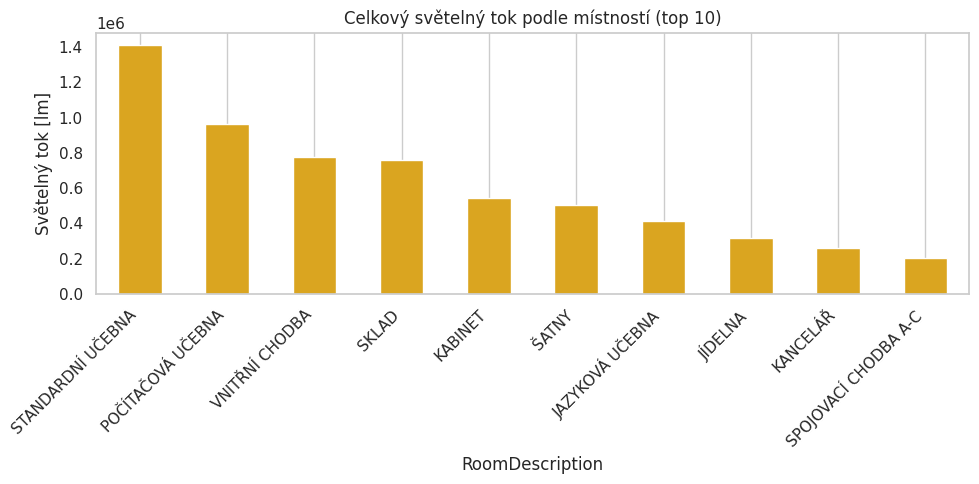

In [60]:
print("Energetika:")
print(f"• Celkový příkon (TotalWattage): {df['TotalWattage'].sum():.1f} W")
print(f"• Průměrný příkon na zdroj: {(df['TotalWattage'] / df['NumberOfSources']).mean():.2f} W/zdroj")
print(f"• Průměrný proud (ActualCurrent): {df['ActualCurrent'].mean():.2f} A")
print(f"• Průměrné napětí (ActualVoltage): {df['ActualVoltage'].mean():.2f} V")

print("\nSvětelná technika:")
print(f"• Celkový světelný tok: {df['LuminousFlux'].sum():.0f} lm")
print(f"• Průměrná účinnost (lm/W): {(df['LuminousFlux'] / df['TotalWattage']).mean():.2f} lm/W")

print("\nZařízení:")
print(f"• Počet unikátních modelů: {df['ModelLabel'].nunique()}")
print(f"• Počet unikátních výrobců: {df['Manufacturer'].nunique()}")

room_flux = df.groupby("RoomDescription")["LuminousFlux"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
room_flux.plot(kind="bar", color="goldenrod")
plt.title("Celkový světelný tok podle místností (top 10)")
plt.ylabel("Světelný tok [lm]")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Celkový příkon všech zařízení dosahuje hodnoty přibližně 144 kW. Průměrný příkon na jeden zdroj je zhruba 65,8 W, což naznačuje, že zařízení jsou spíše nízkonapěťová a nízkopříkonová. Průměrná světelná účinnost je vysoká, kolem 123 lm/W, což značí efektivní využití elektrické energie pro osvětlení. V analyzované sadě dat je zastoupeno pouze 5 unikátních modelů zařízení od jediného výrobce, což může naznačovat standardizaci použitých komponent a jednotného dodavatele. Největší světelný tok je soustředěn ve Standardní učebně, kde dosahuje přibližně 1,4 milionu lumenů. To naznačuje, že tato místnost je pravděpodobně největším nebo nejvíce osvětleným prostorem v rámci budovy, což je logické vzhledem k jejímu primárnímu vzdělávacímu účelu. Druhou nejvíce osvětlenou místností je Počítačová učebna s hodnotou kolem 1 milionu lumenů, což odpovídá potřebě kvalitního osvětlení pro práci s počítači.

In [61]:
sheet = 'IfcOutlet'
df = xls.parse(sheet)

Elektropožadavky:
• Průměrný skutečný proud: 0.87 A
• Průměrné skutečné napětí: 0.00 V
• Průměrný výkonový faktor: 1.00

Bezpečnost a konstrukce:
• S ochranným zemněním: 1155 ks
• Bez ochranného zemnění: 0 ks
• Zásuvky s možností zapojení: 1155 ks

Zařízení:
• Unikátních modelů: 3
• Unikátních výrobců: 1


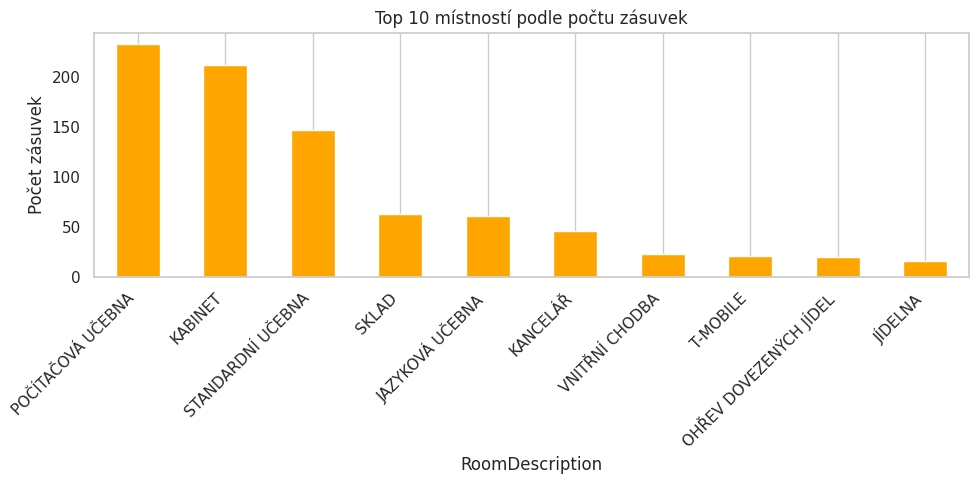

In [62]:
# Elektrotechnické parametry
print("Elektropožadavky:")
print(f"• Průměrný skutečný proud: {df['ActualCurrent'].mean():.2f} A")
print(f"• Průměrné skutečné napětí: {df['ActualVoltage'].mean():.2f} V")
print(f"• Průměrný výkonový faktor: {df['ActualPowerFactor'].mean():.2f}")

# Bezpečnost a konstrukce
print("\nBezpečnost a konstrukce:")
print(f"• S ochranným zemněním: {(df['HasProtectiveEarth'] == True).sum()} ks")
print(f"• Bez ochranného zemnění: {(df['HasProtectiveEarth'] == False).sum()} ks")
print(f"• Zásuvky s možností zapojení: {(df['IsPluggableOutlet'] == True).sum()} ks")

# Obecná struktura
print("\nZařízení:")
print(f"• Unikátních modelů: {df['ModelLabel'].nunique()}")
print(f"• Unikátních výrobců: {df['Manufacturer'].nunique()}")

# Graf – top 10 místností podle počtu zásuvek
top_rooms = df['RoomDescription'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_rooms.plot(kind="bar", color="orange")
plt.title("Top 10 místností podle počtu zásuvek")
plt.ylabel("Počet zásuvek")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Analýza elektropožadavků ukazuje průměrný skutečný proud 0,87 a průměrné skutečné napětí je 0,00 V, což signalizuje problém s kvalitou dat nebo chybějícími měřeními, a vyžaduje další prověření. Veškerá zařízení jsou vybavena ochranným zemněním (1155 ks) a zásuvky jsou plně zapojitelné. Máme 3 unikátní modely od jednoho výrobce, což naznačuje jednotnost zařízení. Největší počet zásuvek je soustředěn v počítačové učebně, kabinetu a standardních učebnách, což odpovídá očekávanému provozu. Celkově je potřeba věnovat pozornost kvalitě dat, zejména hodnotám napětí, aby bylo možné spolehlivě analyzovat a vyhodnotit skutečný stav zařízení.

In [63]:
sheet = 'IfcSwitchingDevice'
df = xls.parse(sheet)

Elektroparametry:
• Průměrný příkon: 10.00 W
• Průměrný světelný tok: 500.00 lm

Bezpečnost:
• S ochranným zemněním: 0 ks
• Bez ochranného zemnění: 635 ks


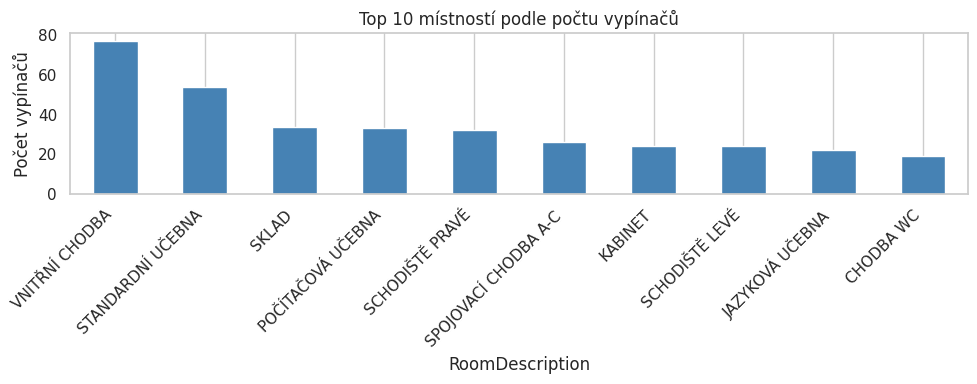

In [64]:
# Základní elektroparametry
print("Elektroparametry:")
print(f"• Průměrný příkon: {df['RatedPowerInput'].mean():.2f} W")
print(f"• Průměrný světelný tok: {df['LuminousFlux'].mean():.2f} lm")

# Konstrukce a ochrana
print("\nBezpečnost:")
print(f"• S ochranným zemněním: {(df['HasProtectiveEarth'] == True).sum()} ks")
print(f"• Bez ochranného zemnění: {(df['HasProtectiveEarth'] == False).sum()} ks")

# Místnosti
top_rooms = df['RoomDescription'].value_counts().head(10)
plt.figure(figsize=(10, 4))
top_rooms.plot(kind="bar", color="steelblue")
plt.title("Top 10 místností podle počtu vypínačů")
plt.ylabel("Počet vypínačů")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

Analýza elektroparametrů ukazuje průměrný příkon 10,00 W a průměrný světelný tok 500 lm. V oblasti bezpečnosti však zjišťujeme, že žádné zařízení není vybaveno ochranným zemněním (0 ks), zatímco bez ochranného zemnění je evidováno 635 ks. Tento stav poukazuje na vážný problém, který je třeba ověřit a řešit z hlediska bezpečnostních norem. Nejvíce vypínačů se nachází ve VNITŘNÍ CHODBĚ, STANDARDNÍ UČEBNĚ a SKLADU, což odpovídá předpokládanému rozmístění osvětlení.Je však důležité zdůraznit, že kvalita dat vykazuje zjevné nedostatky.